In [48]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileExistsError: ignored

In [128]:
import pandas as pd
pd.set_option('display.max.colwidth', 130)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


import feedparser
from bs4 import BeautifulSoup as bs
import urllib
import urllib.request as req
import requests

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

from konlpy.tag import Kkma, Okt, Komoran
from konlpy.utils import pprint

from collections import Counter
from datetime import datetime

In [50]:
now = datetime.now()    # 현재 시간

# url query 검색주기를 1일로 활용할 것이므로
ds = "{0}.{1}.{2}.{3}.{4}".format(now.year, now.month, now.day, now.hour, now.minute)   #검색일
de = "{0}.{1}.{2}.{3}.{4}".format(now.year, now.month, now.day-1, now.hour, now.minute)   #전일

In [51]:
# datetime를 활용해서 구한 ds, de (어제,오늘 날짜)를 f_formatting으로 url에 넣어줌
url = "https://search.naver.com/search.naver?&where=news&query=춘천&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=4&ds={0}&de={1}&docid=&nso=so:r,p:1d,a:all&mynews=0&cluster_rank=38&start=1&refresh_start=0".format(ds, de)
## url query 검색기간 옵션   pd=4: 당일, pd=1: 1주, pd=2: 1개월

raw = requests.get(url)
html = raw.content
soup = bs(html, 'html.parser')

In [52]:
# html 참고
links = soup.select('ul.type01>li>dl>dd.txt_inline>a')
links

[]

In [96]:

h_list = []
for n in range(1, 150, 10):
    raw_url = requests.get("https://search.naver.com/search.naver?&where=news&query=춘천&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=4&ds={0}&de={1}&docid=&nso=so:r,p:1d,a:all&mynews=0&cluster_rank=38&start=".format(ds, de)+str(n)+"&refresh_start=0")
    html = raw_url.content
    soup = bs(html, 'html.parser')
    a_tags = soup.findAll('a',{'class':'_sp_each_url'})
    for a_tag in a_tags:
        # 사이트별 html code가 상이하므로 네이버 뉴스기사만 크롤링해서 h_list에 주소 추가
        if 'naver' and 'mode' in a_tag['href']:
          h_list.append(a_tag['href'])

In [98]:
article_body = []
for i in range(len(h_list)):
    each_url = requests.get(h_list[i])
    each_html = bs(each_url.text, 'html.parser')
    
    content = each_html.select_one('#articleBodyContents') # content변수에 articleBodyContents 내용 저장
    output = ''
    for item in content.contents:
        stripped = str(item).strip()
        if stripped == '':
            continue
        if stripped[0] not in ['<','/']:
            output += str(stripped)
            output = output.replace('본문 내용TV플레이어','').strip()
            output = output.replace('무단 전재 및 재배포 금지','').strip()
    article_body.append(output)

In [99]:
article_body

['(춘천=연합뉴스) 이상학 기자 = 강원 춘천시가 반려동물 산업을 본격화하는 플랫폼 비전 선포식을 7일 신북읍 옛 102보충대 주차장에 신축한 동물보호센터에서 열었다.춘천시는 이번 선포식을 시작으로 반려동물 산업육성 메카로 만들기 위한 본격적인 사업에 돌입하기로 했다.이를 위해 올해부터 2024년까지 600억원을 투입해 인프라 구축, 산업육성, 연결 플랫폼 구축, 신산업 육성을 추진할 방침이다.이날 동물보호센터 신축을 기념해 열린 행사는 반려동물 동행 플랫폼 비전 선포식에 이어 강원도, 강원대, 더존과 산·학·관 협약식이 체결됐다.또 성숙한 반려문화 장려를 위해 유기견 4마리를 분양하는 행사와 동물보호센터 신축 기념 현판 제막식도 했다.아울러 행사 참여 시민을 위해 미니 도그쇼와 반려동물 관련 상식 OX 퀴즈 대회, 내장 칩 무료등록, 펫 티켓 캠페인, 플리마켓, 체험부스, 사진전이 마련됐다.이재수 춘천시장은 "새롭게 신축된 동물보호센터와 함께 앞으로 구축될 동행 플랫폼을 거점 기반으로 반려동물 산업이 미래를 이끌어가는 효자사업이 될 수 있도록 관련 정책을 적극적으로 추진하겠다"고 말했다.한편 동물보호센터는 약 20억원을 들여 710.53㎡ 규모에 관리동과 보호동 2동을 갖췄다.hak@yna.co.kr',
 "[춘천]춘천을 반려동물 도시로 육성하는 사업이 추진된다.춘천시는 7일 동물보호센터 신축부지인 옛 102보충대대 주차장에서 '춘천 반려동물 동행 플랫폼 비전선포식'을 개최한다. 이번 행사는 '사람과 동물이 함께 행복한 춘천'의 비전을 제시하고 반려동물 산업육성 메카도시 선포를 위해 마련됐다.이날 선포식에서는 반려문화 유도를 위해 유기견 5마리를 분양하는 행사와 함께 동물보호센터 신축 기념 현판제막식 등이 열린다.하위윤기자ⓒ 강원일보,",
 '(춘천=뉴스1) 김정호 기자 = 강원 춘천이 반려동물 산업의 메카로 거듭난다.춘천시는 7일 동물보호센터(옛 102보충대)에서 한기호 국회의원, 김성호 행정부지사, 김헌영 강원대 총장, 황환주 시의장 등이 참석한 가운데

In [56]:
okt = Okt()

In [57]:
doc_okt=[]

In [100]:
for i in range(len(article_body)):
  okt_nouns = ' '.join(okt.nouns(article_body[i]))

  doc_okt.append(okt_nouns)

  tfidf_vectorizer = TfidfVectorizer(min_df=1)
  tfidf_matrix_okt = tfidf_vectorizer.fit_transform(doc_okt)

# Vertorization

In [101]:
noun_list = []

for i in range(len(doc_okt)):
  for j in range(len(doc_okt[i].split(' '))):
    noun_list.append(doc_okt[i].split(' ')[j])

counts = Counter(noun_list)
print(counts)


# 명사 추출 및 명사의 빈도수 계산

Counter({'도': 1327, '춘천': 696, '춘천시': 616, '검증': 567, '단': 439, '의원': 420, '등': 408, '강원': 387, '구성': 379, '반려동물': 371, '재': 350, '기온': 330, '것': 317, '낮': 310, '센터': 307, '산업': 300, '위해': 293, '과장': 283, '시민': 280, '서울': 277, '고': 273, '기자': 255, '의회': 255, '비': 245, '정화': 243, '위': 242, '민주당': 237, '보호관찰': 232, '수': 225, '이': 217, '최고': 215, '국방부': 213, '대구': 203, '광주': 197, '동물보호': 195, '환경부': 194, '위원': 191, '예상': 185, '대전': 184, '육성': 181, '관': 178, '소': 171, '부산': 168, '통해': 166, '및': 165, '민간': 164, '플랫폼': 163, '규명': 163, '범': 160, '소년원': 159, '날': 158, '바다': 158, '며': 157, '이번': 150, '운영': 150, '미래': 148, '캠프': 146, '페이지': 146, '결과': 146, '원인': 145, '신축': 144, '인': 142, '제주도': 142, '지역': 139, '추진': 138, '마련': 138, '말': 138, '관련': 137, '전주': 137, '토양오염': 132, '가운데': 131, '자문': 131, '통합': 130, '정당': 130, '인천': 130, '사업': 128, '뉴스': 128, '강릉': 126, '정책': 125, '석': 125, '계획': 123, '남부': 123, '소장': 123, '주민': 121, '실장': 121, '이상': 120, '학': 118, '국가': 118, '앞바다': 118, '위원회': 117, '북

In [180]:
x = normalize(tfidf_matrix_okt)

# L2 정규화

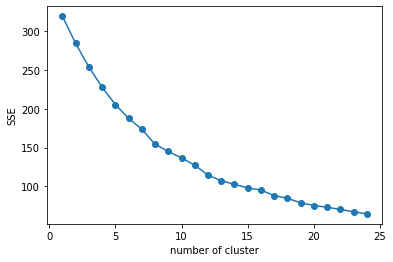

In [127]:
def elbow(X):
  sse = []
  for i in range(1,25):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

  plt.plot(range(1,25), sse, marker='o')
  plt.xlabel('number of cluster')
  plt.ylabel('SSE')
  plt.show()
elbow(x)

# Elbow Method

In [191]:
kmeans = KMeans(n_clusters = 12).fit(x)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [205]:
df = pd.DataFrame(data=doc_okt)
df.columns = ["body"]
df['num']=0
for i in range(len(df)):
  df.iloc[i, 1] = i

df['labels'] = labels
# 클러스터링 라벨 부여
df

,body,num,labels
0,춘천 연합뉴스 이상 학 기자 강원 춘천시 반려동물 산업 본격 플랫폼 선포 신북읍 보충대 주차장 신축 동물보호 센터 춘천시 이번 선포 시작 반려동물 산업 육성 메카 만들기 위 본격 사업 돌입 위해 올해 투입 인프라 구축 산업 육...,0,9
1,춘천 춘천 반려동물 도시 육성 사업 추진 춘천시 동물보호 센터 신축 부지 보충대 주차장 춘천 반려동물 동행 플랫폼 비 전선 포식 개최 이번 행사 사람과 동물 춘천 의 제시 반려동물 산업 육성 메카 도시 선포 위해 마련 날 선포...,1,0
2,춘천 뉴스 김정호 기자 강원 춘천 반려동물 산업 메카 거듭 춘천시 동물보호 센터 보충대 한기호 국회의원 김성호 행정부 지사 김헌영 강원 총장 황 환주 의장 등 참석 가운데 춘천 반려동물 동행 플랫폼 비 전선 포식 개최 시 강원...,2,7
3,강원 춘천시 반려동물 산업 중심 도시 도약 선언 춘천시 오전 신북읍 용산 리 보충대 반려동물 동행 플랫폼 비 전선 포식 행사 개최 반려동물 산업 중심 도시 도약 발판 마련 위해 마련 자리 시 날 반려동물 동행 플랫폼 선포 강원...,3,9
4,춘천 연합뉴스 이상 학 기자 강원 춘천시 신북읍 보충대 주차장 조성 동물보호 센터 반려동물 동행 플랫폼 선포 이 참석 기념 막,4,10
...,...,...,...
352,올해 춘천 마임 축제 춘천인형극제 기존 축제 형태 각각 방식 개막 코로나 영향 대규모 관객 형식 탈피 축제 기간 대폭 공간 분산 시민 수 축제 재탄생 것 춘천 마임 축제 지난 춘천 미르 차 아파트 일원 춘천 마임 씬 를 개막 ...,352,2
353,산업 개발 강원 속초시 공급 속초 아이파크 스위트 조감도 본보기 집 말 본격 분양 속초시 영랑동 번지 일원 속초 아이파크 스위트 지하 층 지상 층 생활 숙박시설 실 전용 면적 과 린 생활 시설 구성 실 거주 숙박 임대 사업 개...,353,2
354,영월군 의회 의장 부의 여성 의원 선출 등 지역 여풍 군 의회 지난 임시회 손경희 의장 정의 순 의원 각각 의장 부의 선출 역대 군 의회 제 창희 의장 제 조정 의장 등 의장 부의 동시 배출 것 이번 처음 앞서 지난달 영월군 ...,354,2
355,맑은 날씨 춘천시 신북읍 유기농 카페 시민 해바라기 밭 무르 여름 정취 만끽 박승 선기 강원 일보,355,2


In [206]:
df.loc[df['labels']==2]

,body,num,labels
224,춘천 춘천시 국비 방비 등 원 투입 죽림동 번지 중앙 시장 림 고개 상점가 방문 고객 편의 제공 전통 시장 및 상점가 상인 위 편의 시설 조성 이 시설 고객 터 전시관 화공 상인 위 공동 창업 개발 공간 상인 교육장 남 범수 기자,224,2
225,춘천 춘천 문화재단 춘천 내 문화 예술 소외 지역 거리 콘서트 우리동네 행복 충전 소 를 운영 지난 시작 금 토 일요일 오후 김유정 문학 촌 국립 춘천 박물관 소양댐 정상 등 거리공연 간다 또 야외 공연 장소 기관 문화 소외 ...,225,2
226,춘천 춘천시 어제 부터 단계 개방 계획 종합 복지관 개 소가 단계 개관 단계 개관 생활 속 거리 두기 지침 유지 명 이내 소규모 프로그램 접촉 최소 수 프로그램 운영 종합 사회 복지관 이용자 손 소독제 사용 마스크 착용 의무 ...,226,2
227,서울 연합뉴스 김 주환 기자 수요일 전국 가끔 구름 강원 영서 남부 경북 내륙 경남 북서 내륙 오후 소나기 예상 강수량 아침 최저 기온 도 낮 최고 기온 도로 예보 대기 확산 미세먼지 농도 전국 보통 수준 아침 서해안 일부 중...,227,2
228,춘천 문화재단 강릉 문화재단 기초 단위 문화 예술 교육 거점 구축 지원 사업 선정 문화 체육관 광부 주최 국문 예술 교육 진흥 주관 사업 춘천 강릉 비롯 개 지역 선정 춘천 문화재단 읍 면 지역 시민 문화 삶 지지 사업 추진 ...,228,2
...,...,...,...
344,서울 경제 민선 기 전국 광역 지방자치단체 임기 반환 점 취임 초기 일자리 복지 문제 집중 행정 조직 개편 성장동력 마련 신종 코로나바이러스 감염증 코로나 이 확산 행정 중심 감염병 예방 반환 점 돈 지방정부 코로나 피해 최소...,344,2
352,올해 춘천 마임 축제 춘천인형극제 기존 축제 형태 각각 방식 개막 코로나 영향 대규모 관객 형식 탈피 축제 기간 대폭 공간 분산 시민 수 축제 재탄생 것 춘천 마임 축제 지난 춘천 미르 차 아파트 일원 춘천 마임 씬 를 개막 ...,352,2
353,산업 개발 강원 속초시 공급 속초 아이파크 스위트 조감도 본보기 집 말 본격 분양 속초시 영랑동 번지 일원 속초 아이파크 스위트 지하 층 지상 층 생활 숙박시설 실 전용 면적 과 린 생활 시설 구성 실 거주 숙박 임대 사업 개...,353,2
354,영월군 의회 의장 부의 여성 의원 선출 등 지역 여풍 군 의회 지난 임시회 손경희 의장 정의 순 의원 각각 의장 부의 선출 역대 군 의회 제 창희 의장 제 조정 의장 등 의장 부의 동시 배출 것 이번 처음 앞서 지난달 영월군 ...,354,2


In [66]:
mark = ['*','^','o','v','+']
colr = ['y','b','g','orange','m']
plt.figure(figsize=(16,12))

plt.xlabel('최대소비전력량', fontproperties = font_manager.FontProperties(fname=fontpath, size=12))
plt.ylabel('연간 에너지 비용', fontproperties = font_manager.FontProperties(fname=fontpath, size=12))

for n in range(KmchFridge_part.shape[0]):
    label=kmeans.labels_[n]
    plt.scatter(KmchFridge_part['최대소비전력량'][n], KmchFridge_part['연간 에너지 비용'][n],
                c=colr[label], marker=mark[label],s=100)
    plt.text(KmchFridge_part['최대소비전력량'][n]*1.03, KmchFridge_part['연간 에너지 비용'][n]*0.98,
             KmchFridge_part.index[n])
for i in range(kmeans.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c='r',s=50)

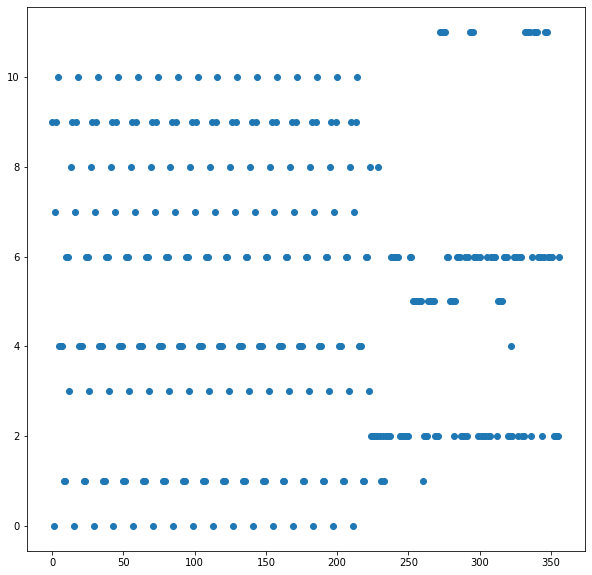

In [208]:
plt.figure(figsize=(10,10))
plt.scatter(df['num'],df['labels'])
plt.show()